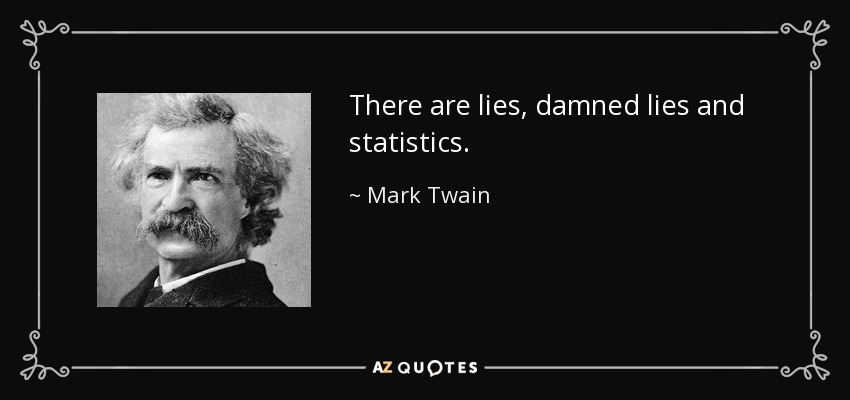

# MDSS Kaggle Tutorial 

#### Created by: Saaransh Mehta

Date: 30/03/2018

Version: 1.0

Environment: Python 3.6 and Jupyter notebook

Libraries used: 
* pandas (for dataframe, included in Anaconda Python 3.6) 
* scipy
* matplotlib
* seaborn for graphs
* numpy


## 1. Introduction
The aim of this ipython notebook is to create a simple regression model for car price prediction. 


## 2.  Import libraries 

In [1]:
%matplotlib inline
import numpy as np
from scipy.stats import linregress
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Possible errors?

## 3.  Loading Data

In [2]:
# Load train and Test set from the location
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")
# Possible errors?

## It's always a good idea to look at the data first.

In [3]:
# Check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

# Save the 'Id' column
train_ID = train['id']
test_ID = test['id']

# Now drop the 'Id' column since it's unnecessary for the prediction process.
train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

# Check data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

# Possible errors?

The train data size before dropping Id feature is : (218912, 13) 
The test data size before dropping Id feature is : (93817, 12) 

The train data size after dropping Id feature is : (218912, 12) 
The test data size after dropping Id feature is : (93817, 11) 


In [4]:
train.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,650,limousine,1995,manual,102,3er,150000,10,petrol,bmw,yes,33775
1,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,67112
2,999,compact,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,27472
3,2000,limousine,2004,manual,105,3_reihe,150000,12,petrol,mazda,no,96224
4,2799,station_wagon,2005,manual,140,passat,150000,12,diesel,volkswagen,yes,57290


In [5]:
test.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes,66954
1,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,90480
2,compact,2001,manual,75,golf,150000,6,petrol,volkswagen,no,91074
3,compact,2008,manual,69,fabia,90000,7,diesel,skoda,no,60437
4,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,94505


<span style="color: red"> Please feel free to create your own notebook structure according to your code structure. </span>

In [6]:
test.describe()

,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,93817.000000,93817.000000,93817.000000,93817.000000,93817.000000
mean,2003.156944,126.215366,125475.713357,6.016713,51524.062590
std,6.883923,62.060779,39183.362013,3.574491,25824.114943
min,1910.000000,1.000000,5000.000000,0.000000,1067.000000
25%,1999.000000,80.000000,100000.000000,3.000000,31084.000000
50%,2003.000000,116.000000,150000.000000,6.000000,50739.000000
75%,2008.000000,150.000000,150000.000000,9.000000,72458.000000
max,2016.000000,999.000000,150000.000000,12.000000,99998.000000


### From looking at the head of both sets, we can see that the only difference in features is "Price". This makes sense because we are trying to predict it!

## 4. Analyzing the Test Variable (Price)

In [7]:
# Getting Description
train['price'].describe()

count    218912.000000
mean       6191.952812
std        7786.458463
min           1.000000
25%        1400.000000
50%        3500.000000
75%        7999.000000
max       99999.000000
Name: price, dtype: float64

The average cost of a car is 6192 dollars and we see some outliers here. For example, price can't be 1 or 99999.


 mu = 6191.95 and sigma = 7786.44



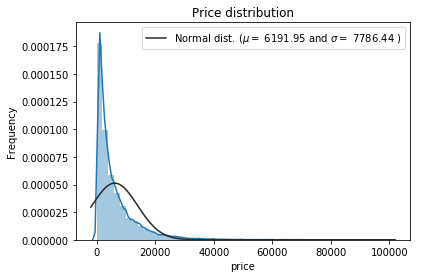

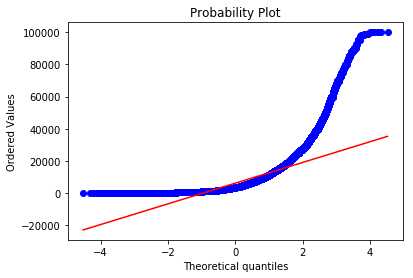

Skewness: 3.355867
Kurtosis: 18.831552


In [8]:
# Plot Histogram
sns.distplot(train['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)
plt.show()

print("Skewness: %f" % train['price'].skew())
print("Kurtosis: %f" % train['price'].kurt())

Looks like a normal distribution? Not quite! Looking at the kurtosis score, we can see that there is a very nice peak. However, looking at the skewness score, we can see that the sale prices deviate from the normal distribution. Going to have to fix this later! We want our data to be as "normal" as possible.

## 5. Multivariable Analysis

Let's check out all the variables! There are two types of features in cars data, categorical and numerical.

In [9]:
# Checking Categorical Data
train.select_dtypes(include=['object']).columns

Index(['vehicleType', 'gearbox', 'model', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')

In [10]:
# Checking Numerical Data
train.select_dtypes(include=['int64','float64']).columns

Index(['price', 'yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration', 'postalCode'],
      dtype='object')

In [11]:
cat = len(train.select_dtypes(include=['object']).columns)
num = len(train.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  6 categorical + 6 numerical = 12 features


### Now the trick is to find the variables most related to car price. To do that we'll look at the correlation.

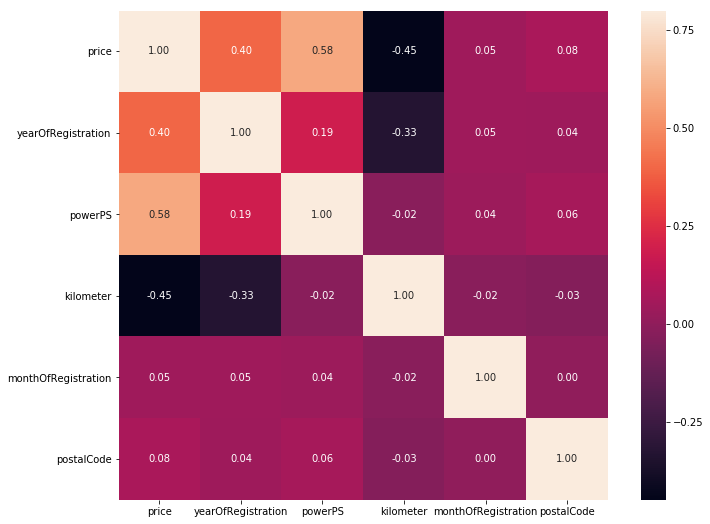

In [12]:
# Correlation Matrix Heatmap
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,cbar=True, annot=True, vmax=.8, square=True, fmt='.2f', annot_kws={'size': 10});

### What do you understand from the graph?
### Does the features make sense?

Looking at individual features now.

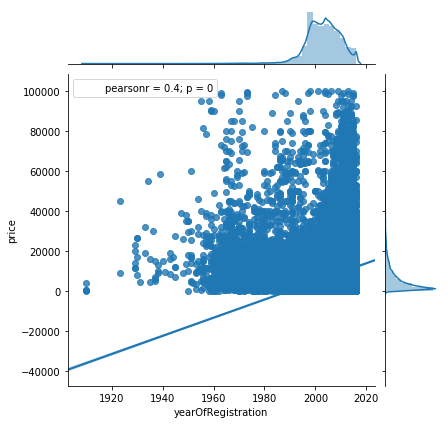

In [13]:
# yearOfRegistration vs Price
sns.jointplot(x=train['yearOfRegistration'], y=train['price'], kind='reg')

It makes sense that people would pay for the newer cars. What doesn't make sense are the few datapoints in the bottom-left of the plot.

We need to take care of this! What we will do is remove these outliers manually.

In [14]:
train[(train['yearOfRegistration']<1920)]

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
14592,3900,station_wagon,1910,manual,90,passat,150000,0,petrol,volkswagen,NaN,88662
46285,400,NaN,1910,NaN,60,golf,150000,0,petrol,volkswagen,NaN,29462
60627,1,limousine,1910,manual,10,andere,5000,2,diesel,mercedes_benz,no,70173
125520,400,NaN,1910,manual,170,3er,5000,0,NaN,bmw,NaN,66333


In [15]:
train[(train['price']<3000)].head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,650,limousine,1995,manual,102,3er,150000,10,petrol,bmw,yes,33775
1,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,67112
2,999,compact,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,27472
3,2000,limousine,2004,manual,105,3_reihe,150000,12,petrol,mazda,no,96224
4,2799,station_wagon,2005,manual,140,passat,150000,12,diesel,volkswagen,yes,57290


In [16]:
train[(train['yearOfRegistration']<1920) & (train['price']<4000)]

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
14592,3900,station_wagon,1910,manual,90,passat,150000,0,petrol,volkswagen,NaN,88662
46285,400,NaN,1910,NaN,60,golf,150000,0,petrol,volkswagen,NaN,29462
60627,1,limousine,1910,manual,10,andere,5000,2,diesel,mercedes_benz,no,70173
125520,400,NaN,1910,manual,170,3er,5000,0,NaN,bmw,NaN,66333


In [17]:
# Removing outliers manually (Points on the bottom left) 
train = train.drop(train[(train['yearOfRegistration']<1920) 
                         & (train['price']<4000)].index).reset_index(drop=True)

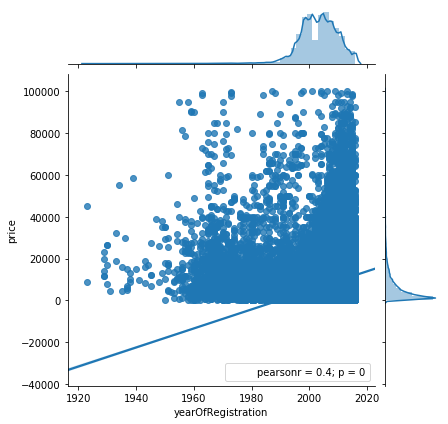

In [18]:
# Let's look at the correlation after outlier removal
# yearOfRegistration vs Price
sns.jointplot(x=train['yearOfRegistration'], y=train['price'], kind='reg')

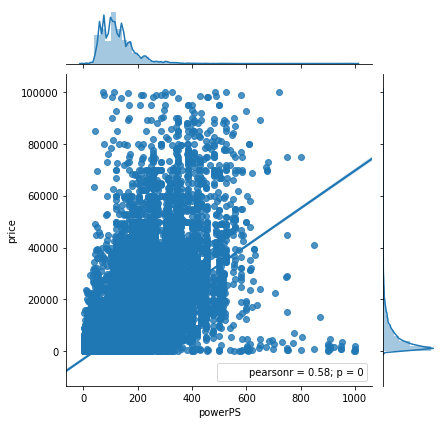

In [19]:
# Same goes for powerPS - DIY
# powerPS vs Price
sns.jointplot(x=train['powerPS'], y=train['price'], kind='reg')

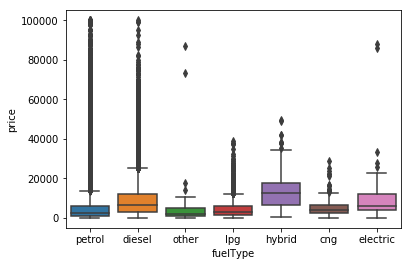

In [20]:
# Outliers in categorical variables
# Total Rooms vs Price
sns.boxplot(x=train['fuelType'], y=train['price'])

### Understand the graph above^

## Different outlier removal methods - your ingenuity comes in.

Note: removal of data is totally discretionary and may or may not help in modeling. Use at your own preference.

Other ways? - interpolation using linear regression.

## 6. Imputation already done for you - cheers to Joseph Kang

Impute missing data and clean data

## 7. Feature Transformation/Engineering

Sometimes derived features are better than, raw features e.g. Area vs. Lenght/ Breath for house price prediction.

In [ ]:
## Example code 
# helper function to convert a categorical feature into a numerical one.
def make_numerical(features, transform):
    if not isinstance(features, list):
        features = [features]
        
    features = list(df[features].select_dtypes(include=["object"]).columns)
    df[features] = df[features].replace(transform)

## 8. Correcting the skewness of price 


 mu = 8.08 and sigma = 1.24



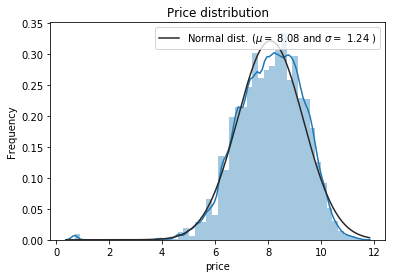

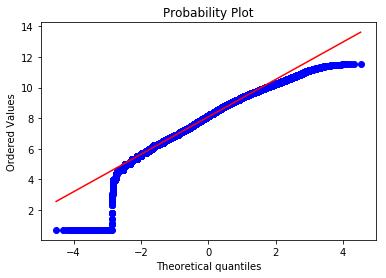

Skewness: -0.609517
Kurtosis: 1.963972


In [21]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["price"] = np.log1p(train["price"])

#Check the new distribution 
sns.distplot(train['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)
plt.show()

y_train = train.price.values

print("Skewness: %f" % train['price'].skew())
print("Kurtosis: %f" % train['price'].kurt())

## 9. Modeling and Predictions

In [25]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
# Problem Loading a new module

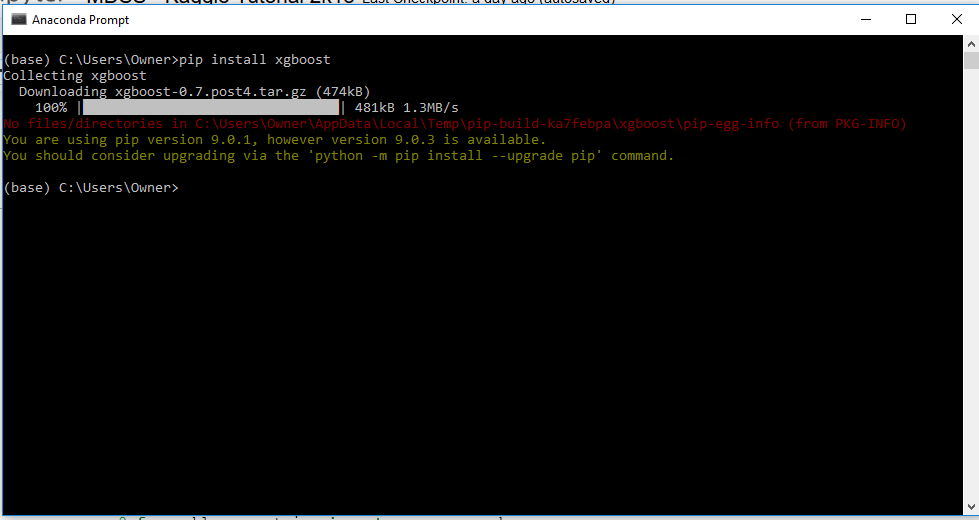

In [28]:
# Cross-validation with k-folds
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

Checking performance of base models by evaluating the cross-validation RMSLE error.

I've edited out the modeling and model evaluation part. This is left to your own discretion.